# Regression with a neural network

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, model_selection


In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

print('train samples:', len(X_train))
print('test samples', len(X_test))

train samples: 354
test samples 152


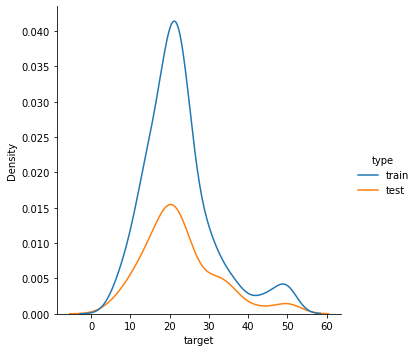

In [5]:
df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.displot(df_set, x="target" ,hue="type", kind="kde", log_scale=False)

In [6]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 13)                27        
_________________________________________________________________
dense (Dense)                (None, 1)                 14        
Total params: 41
Trainable params: 14
Non-trainable params: 27
_________________________________________________________________


In [7]:
%%time
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, verbose=0)

CPU times: user 5.37 s, sys: 427 ms, total: 5.8 s
Wall time: 5.29 s


In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.156938,3.113770,95
96,3.166696,3.157944,96
97,3.160292,3.156730,97
98,3.172411,3.189260,98
99,3.158068,3.128105,99


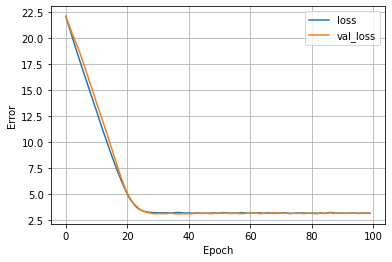

In [9]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

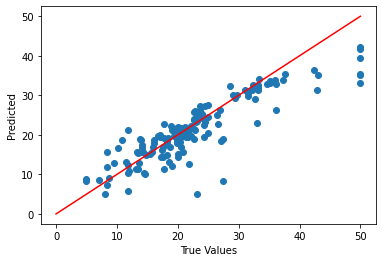

In [10]:
predicted = [x[0] for x in model.predict(X_test)]

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
_ = ax.plot([0, y.max()], [0, y.max()], ls='-', color='red')

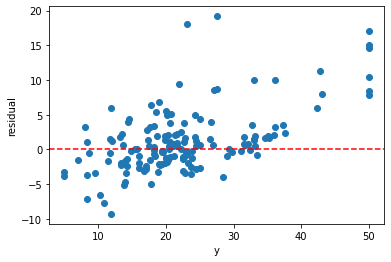

In [11]:
residual = y_test - predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residual)
ax.set_xlabel('y')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

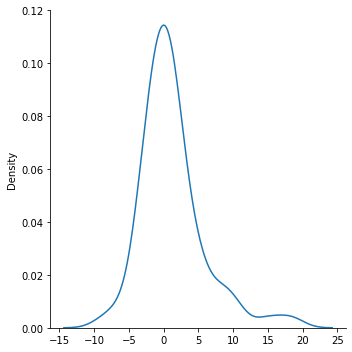

In [12]:
_ = sns.displot(residual, kind="kde");

In [13]:
print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.7505476383883026
mse: 22.455146953788805
rmse: 4.738686205457037
mae: 3.156147472481979
